# Simultaneous bedrock weathering & erosion

## Python setup

In [1]:
# import bedrock_river as br, 
import sympy as sy, numpy as np, matplotlib.pyplot as plt
from sympy import Eq
# from dill.source import getsource
sy.init_printing(pretty_print=True,wrap_line=True)
# from symbols import *
import skfmm
xy_inches = (8,6)

In [2]:
# cm = br.channel.new_model()
# cm.get_params()

## Recipe

1. 

## Expts

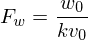

In [131]:
F_w, w_0, v_0, k = sy.symbols('F_w w_0 v_0 k', positive=True)
Delta_x, Delta_t = sy.symbols('\\Delta{x} \\Delta{t}', positive=True)

F_w_eqn = sy.Eq(F_w, w_0/(k*v_0))
F_w_eqn

# w_0__ = np.float64(2.0)
# v_0__ = np.float64(0.5)
# k__   = np.float64(0.5)

# x_domain_size = 20.0
# t_domain_size = 200
# Delta_x__ = 0.01
# Delta_t__ = 0.01

w_0__ = np.float64(5.0)
v_0__ = np.float64(0.3)
k__   = np.float64(1)

x_domain_size = 30.0
t_domain_size = 200
Delta_x__ = 0.01
Delta_t__ = 0.02

n_x_domain = np.int64(x_domain_size/Delta_x__)+1
t_n_steps  = np.int64(t_domain_size/Delta_t__)+1

F_w_eqn.subs({w_0:w_0__, v_0:v_0__, k:k__})
F_w__ = np.float64(_.rhs)

In [132]:
eta_array = np.zeros((t_n_steps,n_x_domain),dtype=np.float64)
eta_array[0] = np.ones(n_x_domain,dtype=np.float64)
phi_array = np.zeros((t_n_steps),dtype=np.float64)
x_array   = np.linspace(0,x_domain_size,n_x_domain)
t_array   = np.linspace(0,t_domain_size,t_n_steps)
v_array   = np.linspace(0,t_domain_size,t_n_steps)
H = np.heaviside
def expH(x):
    return np.exp(-x*H(x,0))

# print('x =',x_array)
for j,t_step in enumerate(t_array[:-1]):
    f__ = np.int64(phi_array[j]/Delta_x__)
    fp1__ = f__+1
    fp2__ = f__+2
    if fp2__>=n_x_domain:
        break
    Delta_phi__ = (eta_array[j,f__]/F_w__)*Delta_t__
    v_array[j+1] = Delta_phi__/Delta_t__
    phi_array[j+1] = phi_array[j]+Delta_phi__
#     print(eta_array[j,fp1__],eta_array[j,f__],eta_array[j,fp1__]-eta_array[j,f__])
    eta_array[j+1,f__] = (
          eta_array[j,f__] 
        + (Delta_phi__/Delta_x__)*(eta_array[j,fp1__]-eta_array[j,f__])
        + Delta_t__*expH(x_array[f__]-phi_array[j])
    )
    eta_array[j+1,fp1__:-1] = (
          eta_array[j,fp1__:-1] 
        + (Delta_phi__/Delta_x__)*(eta_array[j,fp2__:]-eta_array[j,fp1__:-1])
        + Delta_t__*expH(x_array[fp1__:-1]-phi_array[j])
    )
#     d_eta_2 = eta_array[j,-2]-eta_array[j,-3]
#     d_eta_1 = eta_array[j,-1]-eta_array[j,-2]
#     d_eta_0 = d_eta_1-d_eta_2
    eta_array[j+1,-1] = (
          eta_array[j,-1] 
        + (Delta_phi__/Delta_x__)*(eta_array[j,-1]-eta_array[j,-2])*0.98
        + Delta_t__*expH(x_array[-1]-phi_array[j])
    )
print(j)
print('eta =',np.round(eta_array[j+1],3))
print('f =',np.round(phi_array[:j+2],3))
print('v =',np.round(v_array[:j+2],3))
F_w_eqn.subs({w_0:w_0__, v_0:v_0__, k:k__})
print('nu_s =',0.5*(1+np.sqrt(1+4*F_w__))/F_w__)

7314
eta = [0. 0. 0. ... 0. 0. 0.]
f = [0.0000e+00 1.0000e-03 2.0000e-03 ... 2.9989e+01 2.9994e+01 0.0000e+00]
v = [0.000e+00 6.000e-02 6.100e-02 ... 2.420e-01 2.430e-01 1.463e+02]


nu_s = 0.2767792535850613


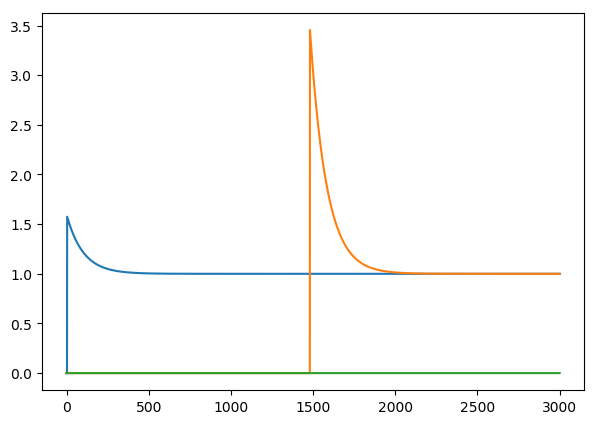

In [133]:
fig = plt.figure()
fig.set_size_inches(7,5)
fig.set_dpi(100)
plt.plot(eta_array[30])
plt.plot(eta_array[j//2])
plt.plot(eta_array[j+1]);

In [134]:
def eta_model(tau,chi,F_w):
    nu_s = 0.5*(1+np.sqrt(1+4*F_w))
    print(nu_s,F_w)
    return 1+(F_w/nu_s)*np.exp(-(chi))

tau__ = t_array[-1]
# chi__ = x_array
# tau__ 
# chi__

3.4297326385411577 8.333333333333334


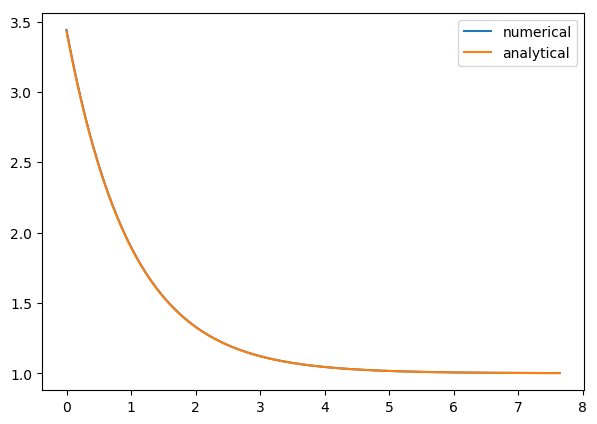

In [135]:
j__ = (j*3)//4
phi__ = phi_array[j__]
phi0__ = int(phi__/Delta_x__)
y__ = x_array[phi0__:]-x_array[phi0__] #+Delta_x__/2

np.max(eta_array[j__,:])
eta_numerical = eta_array[j__,phi0__:]
eta_analytical = eta_model(tau__,y__,F_w__/2)

fig = plt.figure()
fig.set_size_inches(7,5)
fig.set_dpi(100)
plt.plot(y__,eta_numerical, label='numerical');
plt.plot(y__,eta_analytical , label='analytical'  );
# plt.plot(y__,eta_numerical/eta_analytical , label='numerical/analytical'  );
# plt.autoscale(enable=True, tight=True, axis='x')
plt.legend()